<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Math 345M LAB - Week 1**

In this lab we will be performing a basic analysis of a dataset. We will calculate basic statistical qunatities like mean and standart deviation, along with that we will check for outlier data points using two different methods.

In [2]:
# we start by importing the necessary packages

from google.colab import files 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Here, we will upload our data from a local machine directly into our colab notebook

uploaded = files.upload()



Saving beer.csv to beer.csv


In [19]:
df = pd.read_csv('beer.csv') 

df

# Here are some basic manipulations that one can do using the panda library

# df.head(4) # selects the first 4 rows of the dataset
# df.tail(3) # selects the last 3 rows of the dataset

# ## Read Headers
# print(df.columns)

# ## Read each Column
# print(df['Brand'][0:5])

# ## Read each Row
# print(df.iloc[1:4])

# ## Read a specific location (R,C)
# print(df.iloc[2,2])


,Brand,Brewery,PercentAlcohol,Calories,Carbohydrates
0,Anchor Steam,Anchor,4.9,153,16.0
1,Anheuser Busch Natural Light,Anheuser Busch,4.2,95,3.2
2,Anheuser Busch Natural Ice,Anheuser Busch,5.9,157,8.9
3,Aspen Edge,Adolph Coors,4.1,94,2.6
4,Blatz Beer,Pabst,4.8,153,12.5
...,...,...,...,...,...
81,Yuengling Ale,D. G. Yuengling,5.0,145,10.0
82,Yuengling Porter,D. G. Yuengling,4.5,150,14.0
83,Yuengling Premium Beer,D. G. Yuengling,4.4,135,12.0
84,Yuengling Light,D. G. Yuengling,3.8,98,6.6


In [20]:
# Selecting specific columns out of the dataset (using the header's name)
carbohydrates  = df['Carbohydrates']
calories       = df['Calories']
alcohol        = df['PercentAlcohol']

**Histogram**

First of all we are going to construct a histogram of the data. The purpose of a histogram is to graphically summarize the distribution of a univariate data set. A histogram is a simple graphical repesentation of the data that shows the following information:

*   center (i.e., the location) of the data;
*   spread (i.e., the scale) of the data;
*   skewness of the data;
*   presence of outliers;
*   presence of multiple modes in the data.


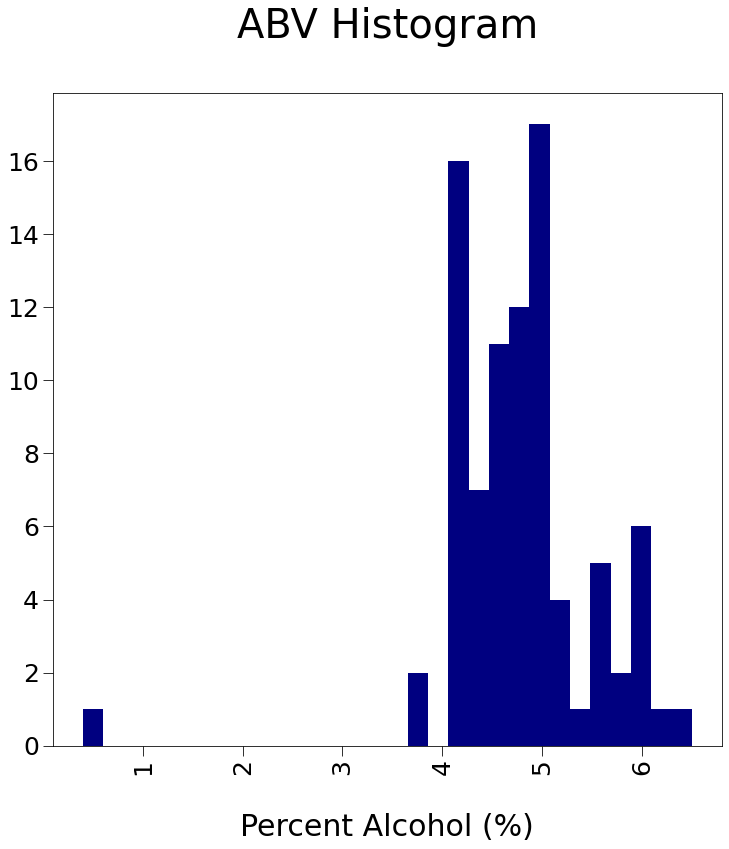

In [21]:
plt.figure(figsize = (12,12))

plt.hist(alcohol, bins = 30, color = 'navy')

plt.title("ABV Histogram\n", fontsize=40)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()


> **Mean and Standard Deviation**

Given a dataset $X = \{x_1, x_2, ..., x_N\}$, the mean of the dataset is defined as:

$$
\bar{x} = \frac{1}{N}\sum_{i=1}^{N}x_{i}
$$

while the standart deviation is definied as:

$$
s = \sqrt{\frac{\left( \sum x_i - \bar{x} \right)^2}{N-1} }
$$

> ***Outliers***


Outliers are individual values that fall outside of the overall pattern of a data set. This definition is somewhat vague and subjective, so it is helpful to have a rule to apply when determining whether a data point is truly an outlier.
In order to identify the outliers in a dataset we will consider two methods: the *Emperical Rule* and the *Interquartile Rule*.

> **Empirical Rule**

When dealing with a normal distribution (i.e. Gaussian distrbuiton):

$$
P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
$$

*   About $68\%$ of values fall within %1% standart deviation from the mean $\mu$.
*   About $95\%$ of values fall within %1% standart deviation from the mean $\mu$.
*   About $99.7\%$ of values fall within %1% standart deviation from the mean $\mu$.

You can use the rule when you are told your data is normal, nearly normal, or if you have a unimodal distribution (i.e. one with a single peak) that is symmetric. 


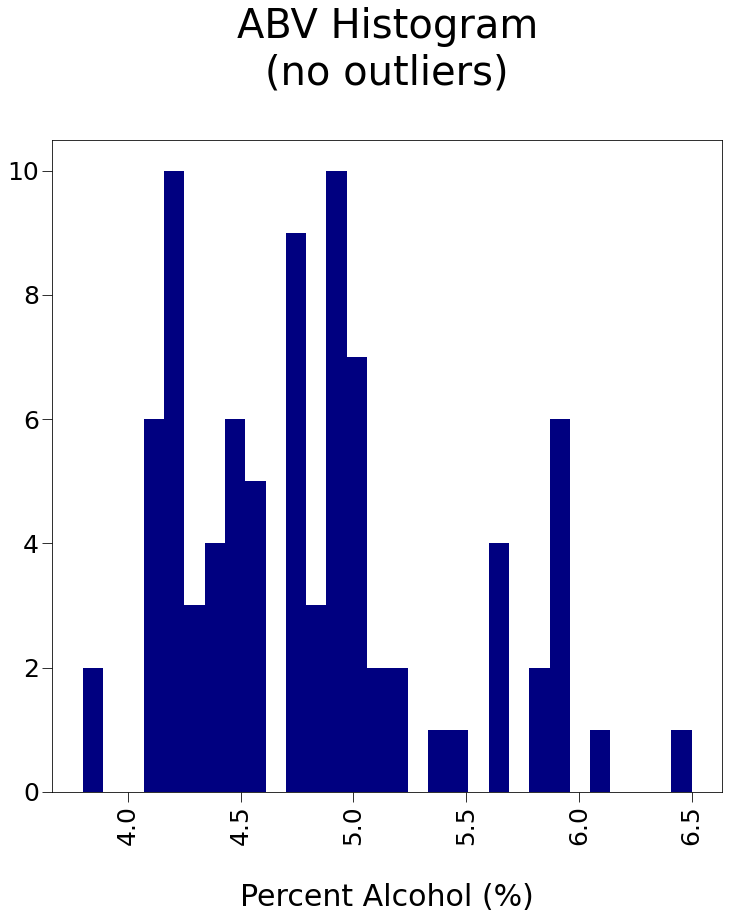

List of ABV outliers using the Empirical Rule:
	 Anheuser Busch has 0.4% ABV.


In [46]:
# finding the mean and standart deviation of the dataset
mean = alcohol.mean()
std = alcohol.std()

# 3 standart deviations

clean_data_index = [] # array of indeces  (no outliers)
outliers_index = []   # array of indeces  (outliers)

for index in range ( len(alcohol) ):
    if ( alcohol[index] < mean - 3 * std ) or ( alcohol[index] > mean + 3 * std ):
        outliers_index.append(index)
    else:
        clean_data_index.append(index)


    # plotting the histogram of data without outliers

plt.figure(figsize = (12,12))

plt.hist(alcohol[clean_data_index], bins = 30, color = 'navy')

plt.title("ABV Histogram\n(no outliers)\n", fontsize=40)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()

    # presenting the outliers

print("List of ABV outliers using the Empirical Rule:")

for index in outliers_index:
    print(f'\t {df.iloc[index, 1]} has {df.iloc[index, 2]}% ABV.')

>**Interquartile Rule**


Any set of data can be described by its five-number summary. These five numbers, which give you the information you need to find patterns and outliers, consist of (in ascending order):

1) $Q_0$ represents the minimum or lowest value of the dataset.

2) $Q_1$ represents a quarter of the way through the list of all data.

3) $Q_2$ represents the median of the data set, i.e. the midpoint of the whole list of data.

4) $Q_3$ represents three-quarters of the way through the list of all data.

5) $Q_4$ represents the maximum or highest value of the data set.

Another useful quantity in a dataset is the *interquratile range* which is defined as:

$$
IQR = Q_3 - Q_1
$$


**Using the Interquartile Rule to Find Outliers**

Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

*   Calculate the interquartile range for the data.
*   Multiply the interquartile range ($IQR$) by $1.5$
*   Add $1.5 (IQR)$ to the third quartile. Any number greater than this is a suspected outlier.
*   Subtract $1.5  (IQR)$ from the first quartile. Any number less than this is a suspected outlier.









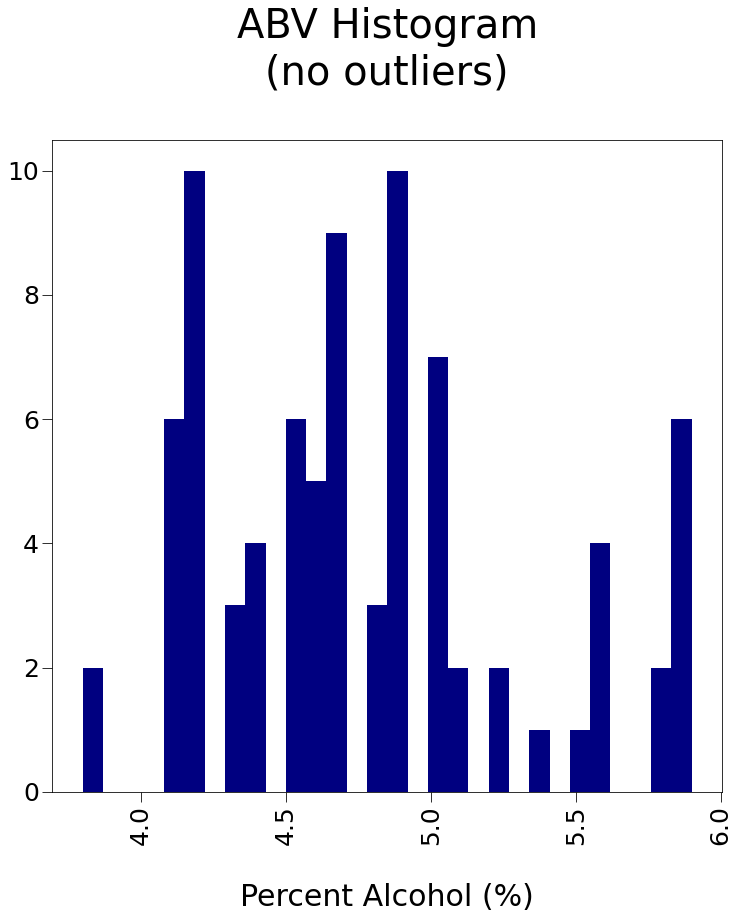

List of ABV outliers using the Empirical Rule:
	 G. Heileman has 6.1% ABV.
	 Anheuser Busch has 0.4% ABV.
	 Red Hook has 6.5% ABV.


In [56]:
# Interquartile Range Rule
Q1,Q3 = np.percentile(sorted(alcohol),[25,75])
IQR = Q3-Q1

lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

clean_data_index_IQR = [] # array of indeces  (no outliers)
outliers_index_IQR = []   # array of indeces  (outliers)

for index in range ( len(alcohol) ):
    if ( alcohol[index] < lower_range ) or ( alcohol[index] > upper_range ):
        outliers_index_IQR.append(index)
    else:
        clean_data_index_IQR.append(index)


    # plotting the histogram of data without outliers

plt.figure(figsize = (12,12))

plt.hist(alcohol[clean_data_index_IQR], bins = 30, color = 'navy')

plt.title("ABV Histogram\n(no outliers)\n", fontsize=40)

plt.xlabel("\nPercent Alcohol (%)", fontsize=30)

plt.tick_params(direction='out', length=10)

plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25, rotation=0)

plt.show()

    # presenting the outliers

print("List of ABV outliers using the Empirical Rule:")

for index in outliers_index_IQR:
    print(f'\t {df.iloc[index, 1]} has {df.iloc[index, 2]}% ABV.')

Sources:

https://www.statisticshowto.com/empirical-rule-2/

https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/

https://www.itl.nist.gov/div898/handbook/eda/section3/histogra.htm